**Explications**

* **Étape 1 :** On charge le jeu de données à partir d'une URL.
* **Étape 2 :** On explore le jeu de données pour en connaître les principales caractéristiques.
* **Étape 3 :** On nettoie le jeu de données en supprimant les colonnes inutiles, en remplaçant les valeurs manquantes et en codant les variables catégorielles.
* **Étape 4 :** On corrige le jeu de données en supprimant les outliers.
* **Étape 5 :** On sépare les données

**Étapes**

1. **Charger le jeu de données**

In [19]:
# https://github.com/ageron/handson-ml/blob/master/datasets/housing/housing.csv

import pandas as pd

# Télécharger le jeu de données
from os.path import join
# Charger les données
df = pd.read_csv(join("..","data","Housing.csv") )

# Afficher les 5 premières lignes
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


2. **Explorer le jeu de données**

In [20]:
# Nombre d'observations et de variables
df.shape


(20640, 10)

In [21]:

# Types de données
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [22]:
# Statistiques descriptives
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [23]:
# Valeurs manquantes
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

3. **Nettoyer le jeu de données**

In [24]:
# Supprimer les colonnes inutiles
df = df.drop(["total_bedrooms"], axis=1)

In [25]:
# Remplacer les valeurs manquantes
df["median_income"] = df["median_income"].fillna(df["median_income"].mean())

# Codifier les variables catégorielles
df = pd.get_dummies(df, columns=["ocean_proximity"])
df

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


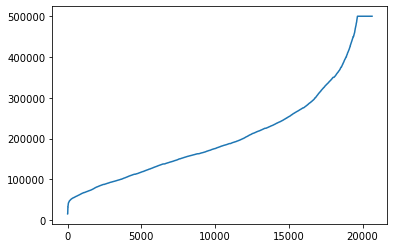

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.sort( df["median_house_value"]))

4. **Corriger le jeu de données**

In [33]:
df["median_house_value"] > 500000

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: median_house_value, Length: 20640, dtype: bool

In [37]:
# Identifier les outliers
outliers = df[df["median_house_value"] > 500000].index
outliers

Int64Index([   89,   459,   493,   494,   509,   510,   511,   512,   514,
              517,
            ...
            20326, 20335, 20367, 20380, 20389, 20422, 20426, 20427, 20436,
            20443],
           dtype='int64', length=965)

In [38]:

# Supprimer les outliers
df = df.drop(outliers)

5. **Transformer le jeu de données**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparer les variables explicatives et la variable cible
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Normaliser les données explicatives
scaler = StandardScaler()
X = scaler.fit_transform(X)
print( X.shape, y.shape )


(19675, 12) (19675,)


In [44]:
# Séparer les données en 2 jeux de données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6. **Entraîner le modèle**

In [46]:
# Importer le modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Créer le modèle
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

LinearRegression()

7. **Évaluer le modèle**

In [48]:
# Prédictions sur les données de validation
y_pred = model.predict(X_test)

# Scores sur les données de validation
score_r2 = model.score(X_test, y_test)
score_mae = mean_absolute_error(y_test, y_pred)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Scores sur les données de test
score_r2_test = model.score(X_test, y_test)
score_mae_test = mean_absolute_error(y_test, y_pred)

print( "SCORE")
print( "R2 : " , score_r2_test)
print( "MAE: " , score_mae_test)

SCORE
R2 :  0.6024069786934431
MAE:  46261.6887013068


8. **Visualiser les performances du modèle**

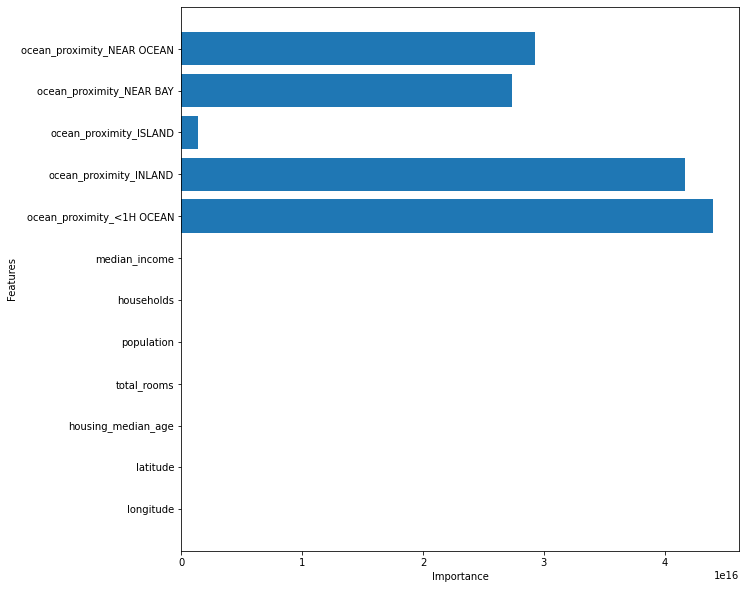

array([-4.69673157e+04, -4.69813759e+04,  1.10582288e+04, -1.74776315e+03,
       -4.19189008e+04,  4.76015287e+04,  5.64834430e+04,  4.39408892e+16,
        4.17024510e+16,  1.41192750e+15,  2.73286348e+16,  2.92269487e+16])

In [51]:
# Importance des variables
feature_importances = model.coef_

# Plot des features importances en transposé
plt.figure(figsize=(10, 10))
plt.barh(df.drop(columns=["median_house_value"]).columns, feature_importances)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

feature_importances